In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import regex as re
from sklearn import tree
from googletrans import Translator
from sklearn.ensemble import RandomForestClassifier
from wordcloud import STOPWORDS ,wordcloud
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
import contractions
import seaborn as sns
from collections import Counter
from sklearn.metrics import confusion_matrix
from textacy import preprocessing as texcy
from sklearn.metrics import classification_report


# Reading data

In [2]:
data = pd.read_csv(r'D:\MYfiles\4th\SecondTerm\NLP\FakeNews\news.csv',sep=',')
data = data.sample(frac=1, random_state=2).reset_index(drop=True)
stop = set(stopwords.words('english'))
data["text"] = data["title"] + "\n" + data["text"]
data

,Unnamed: 0,title,text,label
0,1130,Another Primary Night's Results Confound (At L...,Another Primary Night's Results Confound (At L...,REAL
1,9320,SHOCKER!!! Left Wing MSNBC commentator Chris M...,SHOCKER!!! Left Wing MSNBC commentator Chris M...,FAKE
2,8405,TERROR THREAT WARNING MONDAY | RedFlag News,TERROR THREAT WARNING MONDAY | RedFlag News\n\...,FAKE
3,10107,Comment on Cop’s Attempt to Abuse His Authorit...,Comment on Cop’s Attempt to Abuse His Authorit...,FAKE
4,7408,Swansea City ‘will win Premier League at a can...,Swansea City ‘will win Premier League at a can...,FAKE
...,...,...,...,...
6330,1386,"Iowa caucus results: Ted Cruz wins, Hillary Cl...","Iowa caucus results: Ted Cruz wins, Hillary Cl...",REAL
6331,5286,Truth is Out There: Astronomers Capture 234 Si...,Truth is Out There: Astronomers Capture 234 Si...,FAKE
6332,4231,"Clinton, Trump eye Michigan wins as candidates...","Clinton, Trump eye Michigan wins as candidates...",REAL
6333,4156,"With Common Core tests, a lot at stake for fir...","With Common Core tests, a lot at stake for fir...",REAL


# Data visualization 

In [3]:
from PIL import Image

comment_words =""
mask = np.array(Image.open(r"C:\Users\MohamedNabil\Desktop\Fake.jpg"))

for sample in data['text']:
    val = str(sample)

    # split the value
    tokens = word_tokenize(val)

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens) + " "

stopwords = set(STOPWORDS)

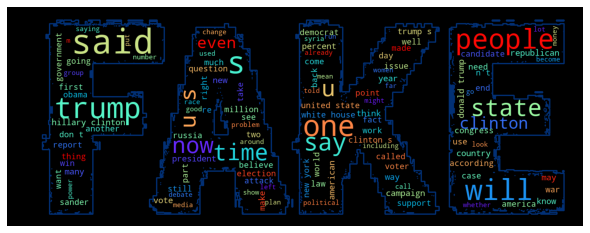

In [4]:
wordcloud_usa = wordcloud.WordCloud(mask=mask,width = 800, height = 500,
                background_color ='Black',
                stopwords = stopwords,
                min_font_size = 15,contour_color='#023075',contour_width=3,colormap='rainbow').generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_usa)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Total Counts of both sets REAL    3171
FAKE    3164
Name: label, dtype: int64


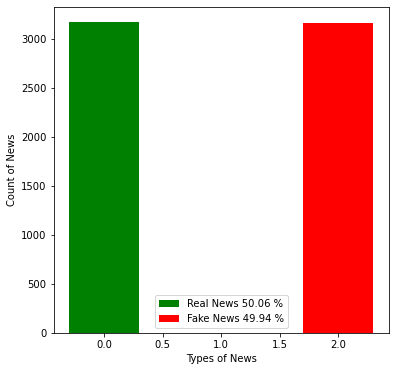

Real News Words:0        957
6        455
7        217
9        792
10      3151
        ... 
6327    1035
6329     856
6330     909
6332     774
6333    1307
Name: text, Length: 3171, dtype: int64
Fake News Words:1        145
2        238
3        618
4        191
5       2269
        ... 
6323    1603
6326      82
6328    1784
6331     448
6334     307
Name: text, Length: 3164, dtype: int64


D:\Conda\envs\NLP_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Conda\envs\NLP_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


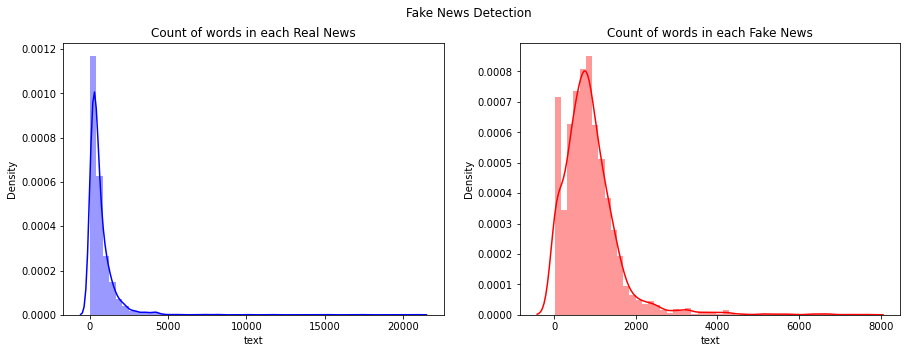

In [5]:
# Count of Fake and Real News
count = data['label'].value_counts()
print('Total Counts of both sets'.format(), count)

print("==============")


def plot_counts(RealNews, FakeNews):
    plt.rcParams['figure.figsize'] = (6, 6)
    plt.bar(0, RealNews, width=0.6, label=f'Real News {"{:.2f}".format(RealNews / (RealNews + FakeNews) * 100)} %', color='Green')
    plt.legend()
    plt.bar(2, FakeNews, width=0.6, label=f'Fake News {"{:.2f}".format(FakeNews / (RealNews + FakeNews) * 100)} %', color='Red')
    plt.legend()
    plt.ylabel('Count of News')
    plt.xlabel('Types of News')
    plt.show()


RealNews = data[data['label'] == 'REAL']
FakeNews = data[data['label'] == 'FAKE']

plot_counts(len(RealNews), len(FakeNews))


def PlotBarChart(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()


RealNews_words=RealNews['text'].str.split().apply(lambda z:len(z))
FakeNews_words=FakeNews['text'].str.split().apply(lambda z:len(z))

print("Real News Words:" + str(RealNews_words))
print("Fake News Words:" + str(FakeNews_words))
PlotBarChart(RealNews_words,FakeNews_words,"Count of words in each Real News","Count of words in each Fake News","Fake News Detection")


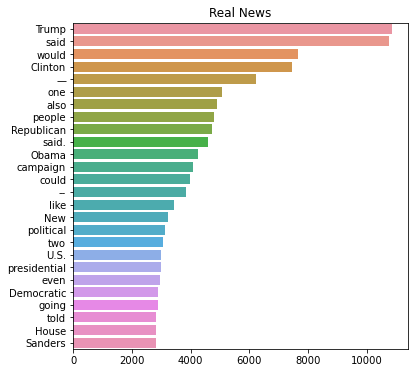

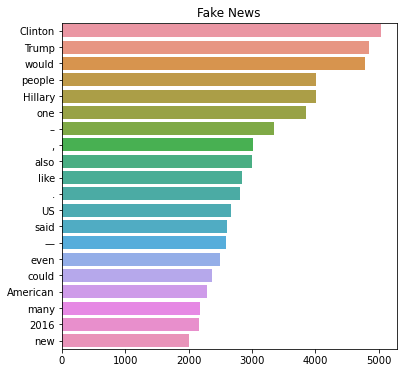

In [6]:
def create_corpus(word):
    corpus = []

    for x in data[data['label'] == word]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


def GetTop100(Label):
    corpus = create_corpus(Label)
    counter = Counter(corpus)
    most = counter.most_common()
    Realx = []
    Realy = []
    for word, count in most[:100]:
        if (word.lower() not in stop):
            Realy.append(word)
            Realx.append(count)

    return [Realx,Realy]

Realx,Realy =  GetTop100('REAL')
Fakex, Fakey = GetTop100('FAKE')

sns.barplot(x=Realx, y=Realy).set(title='Real News')
plt.show()

sns.barplot(x=Fakex, y=Fakey).set(title='Fake News')
plt.show()

# Data PreProcessing

In [7]:
# Noticed from Stats
stop.add('could')
stop.add('would')
stop.add('many')
stop.add('-')
stop.add('will')
stop.add(',')
stop.add('_')
stop.add('.')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word,pos= wordnet_map.get(pos[0],wordnet.NOUN))  for word, pos in pos_tagged_text])

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def SuffixCom(text):
    return re.sub('.+.com$','',text)

def RemoveUserName(text):
    return re.sub('^@[a-zA-Z]*','',text)


def RemovePunctuation(word):
    ans = ""
    for char in word:
        if char not in string.punctuation:
            ans += char
    return ans

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def RemoveNumbers(word):
    ans = ""
    for char in word:
        if not char.isdigit():
            ans += char
    return ans

In [8]:
def PreProcessing(text):
    words = str(text).split()

    CleandText = ""

    for word in words:
        CurrentWord = word.casefold()
        CurrentWord = contractions.fix(CurrentWord)

        # Stop Word
        if CurrentWord in stop:
            continue

        CurrentWord = SuffixCom(CurrentWord)
        CurrentWord = texcy.replace_hashtags(CurrentWord)
        CurrentWord = texcy.replace_user_handles(CurrentWord)
        CurrentWord = texcy.replace_currency_symbols(CurrentWord)
        CurrentWord = texcy.normalize_hyphenated_words(CurrentWord)
        CurrentWord = texcy.remove_punctuation(CurrentWord)
        CurrentWord = remove_emojis(CurrentWord)
        CurrentWord = remove_urls(CurrentWord)
        CurrentWord = remove_html(CurrentWord)

        if len(CurrentWord) > 2:
            CleandText += CurrentWord + " "

    return CleandText

In [9]:
data['text'] = data['text'].apply(PreProcessing)
data['text'] = data['text'].apply(lemmatize_words)

X = data['text']
Y = data['label']


train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X, Y,random_state=2,test_size=0.25)


encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)


# Feature Extraction

In [10]:
tfidf_vect   =  TfidfVectorizer(min_df=1,max_features=50000,ngram_range=(1,2))

xtrain_tfidf =  tfidf_vect.fit_transform(train_x)

xvalid_tfidf =  tfidf_vect.transform(valid_x)

# Model Training

In [11]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,valid_y):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    cf_matrix = confusion_matrix(valid_y, predictions)
    
    target_names = ['Real','Fake']
    print(classification_report(valid_y, predictions, target_names=target_names))

    sns.heatmap(cf_matrix, annot=True,fmt="g",xticklabels=False,yticklabels=False)
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    return metrics.accuracy_score(predictions, valid_y)

# Model Evaluation

              precision    recall  f1-score   support

        Real       0.95      0.95      0.95       792
        Fake       0.95      0.95      0.95       792

    accuracy                           0.95      1584
   macro avg       0.95      0.95      0.95      1584
weighted avg       0.95      0.95      0.95      1584



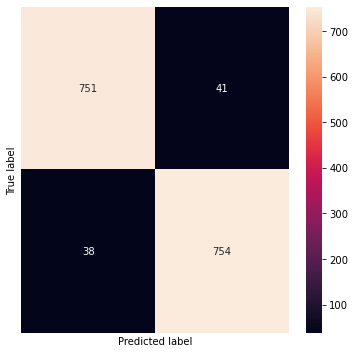

Accuracy:  0.9501262626262627


In [12]:
accuracy = train_model(PassiveAggressiveClassifier(random_state=588), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)
print ("Accuracy: ", accuracy)

              precision    recall  f1-score   support

        Real       0.94      0.91      0.92       792
        Fake       0.91      0.94      0.93       792

    accuracy                           0.92      1584
   macro avg       0.93      0.92      0.92      1584
weighted avg       0.93      0.92      0.92      1584



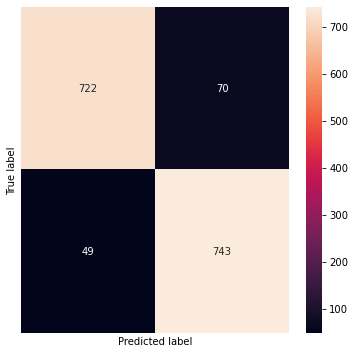

Accuracy:  0.9248737373737373


In [13]:
accuracy = train_model(naive_bayes.MultinomialNB(alpha=0.2),  xtrain_tfidf, train_y, xvalid_tfidf,valid_y)
print ("Accuracy: ", accuracy)

              precision    recall  f1-score   support

        Real       0.93      0.96      0.95       792
        Fake       0.96      0.93      0.95       792

    accuracy                           0.95      1584
   macro avg       0.95      0.95      0.95      1584
weighted avg       0.95      0.95      0.95      1584



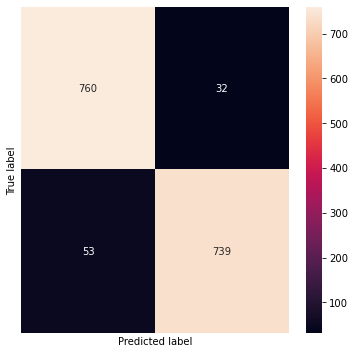

Accuracy:  0.9463383838383839


In [14]:
accuracy = train_model(svm.SVC(C=10), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)
print ("Accuracy: ", accuracy)

              precision    recall  f1-score   support

        Real       0.95      0.95      0.95       792
        Fake       0.95      0.95      0.95       792

    accuracy                           0.95      1584
   macro avg       0.95      0.95      0.95      1584
weighted avg       0.95      0.95      0.95      1584



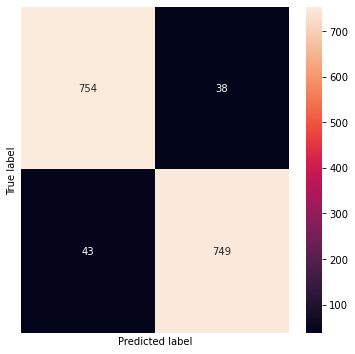

Accuracy:  0.9488636363636364


In [15]:
accuracy = train_model(linear_model.LogisticRegressionCV(max_iter=200,Cs=100,cv=5), xtrain_tfidf, train_y, xvalid_tfidf,valid_y)
print ("Accuracy: ", accuracy)